# K-Nearest Neighbors (KNN)

This notebook uses K-Nearest Neighbors to classify fruit images. We use `n_neighbors=5` as a baseline.

In [1]:
import utils
from sklearn.neighbors import KNeighborsClassifier

# Load Data
X_train, y_train, X_test, y_test, class_names = utils.get_data_and_extract_features()

Loading features from cache...


Training K-NN (k=5)...

=== Evaluation: K-NN (k=5) ===
Accuracy: 80.74%

Classification Report:
              precision    recall  f1-score   support

       Apple       0.74      0.69      0.71       435
      Banana       0.93      0.85      0.89       484
      Grapes       0.83      0.88      0.85       426
       Lemon       0.62      0.72      0.67       408
       Mango       0.60      0.76      0.67       346
      Orange       0.82      0.76      0.79       872
   Pineapple       0.92      0.86      0.89       373
 Pomegranate       0.79      0.87      0.83       787
  Strawberry       0.90      0.89      0.90       419
  Watermelon       0.94      0.80      0.86       527

    accuracy                           0.81      5077
   macro avg       0.81      0.81      0.81      5077
weighted avg       0.82      0.81      0.81      5077



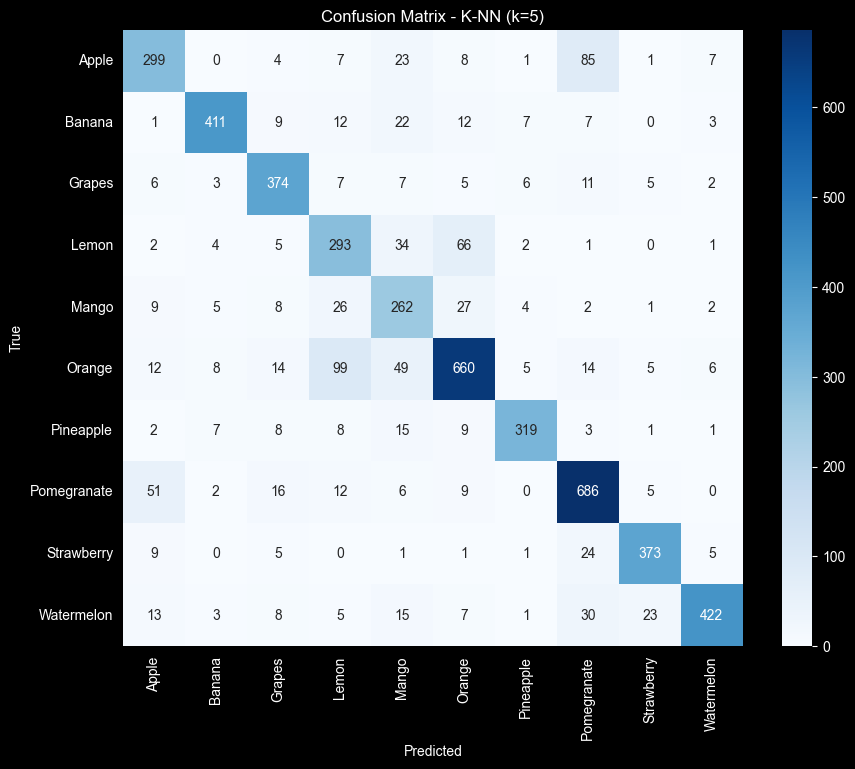

In [2]:
print("Training K-NN (k=5)...")
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

utils.evaluate_model(model, X_test, y_test, class_names, model_name="K-NN (k=5)")


=== Error Analysis: 5 Misclassified Samples ===


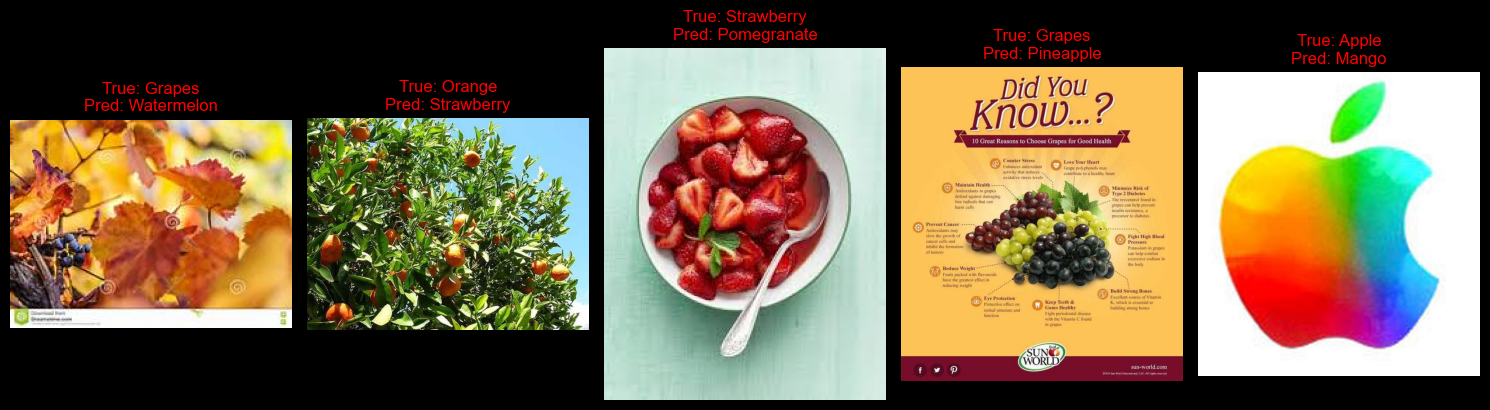

In [3]:
# Visualize Misclassified Images
utils.visualize_model_errors(model, X_test, y_test, class_names)

## Analysis & Insights

### Key Metrics
- **Accuracy**: 80.74%
- **Macro Average F1-Score**: 0.81
- **Weighted Average F1-Score**: 0.81
- K-NN with k=5 neighbors

### Performance Analysis
- **Accuracy**: Medium (80.74%, just above the 70-85% threshold)
- **Best Classes**:
  - Watermelon: 94% precision, 80% recall
  - Banana: 93% precision, 85% recall
  - Pineapple: 92% precision, 86% recall
- **Worst Classes**:
  - Mango: 60% precision, 76% recall (lowest precision)
  - Lemon: 62% precision, 72% recall
  - Apple: 74% precision, 69% recall (lowest recall)

### Error Analysis
- **Confusion Pairs**:
  - Orange → Lemon: 99 misclassifications (largest confusion)
  - Apple → Pomegranate: 85 misclassifications
  - Lemon → Orange: 66 misclassifications (bidirectional with above)
  - Pomegranate → Apple: 51 misclassifications (bidirectional)
  - Orange → Mango: 49 misclassifications
- **Visual Insights**: The K-NN algorithm struggles significantly with citrus fruits, showing 165 total Orange-Lemon bidirectional confusions. The distance-based classification appears sensitive to color similarity, as evidenced by the Apple-Pomegranate confusion (136 total). The model likely groups visually similar fruits in the feature space without capturing subtle distinguishing characteristics. Fruits with distinctive shapes (Watermelon, Banana, Pineapple) perform best, suggesting K-NN works well when feature space clusters are well-separated.

### Conclusion
K-NN achieves moderate performance at 80.74% accuracy, performing reasonably well but trailing behind SVM approaches. The algorithm's strength lies in classifying fruits with distinctive shapes and colors (Watermelon, Banana, Pineapple all >90% precision), but struggles with similar-looking fruits. The high Orange-Lemon confusion rate (165 total errors) is the primary weakness. This performance is typical for K-NN on complex image features, as the distance metric may not capture semantic similarities well. The model would benefit from feature weighting or a different distance metric to better distinguish citrus varieties.
